In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import cv2
import pandas as pd
import yaml
import skimage as ski
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt

In [3]:
#from beakerx.object import beakerx
#beakerx.pandas_display_table()

In [4]:
class_id = 10
f'{class_id:05}'

'00010'

In [5]:
def read_belgium_sample(class_id):
    files = os.listdir(f'./data/data_unzipped/classification/Belgium/train/{class_id:05}/')
    files = [file for file in files if '.p' in file]
    file = np.random.choice(files, 1)
    return cv2.imread(f'./data/data_unzipped/classification/Belgium/train/{class_id:05}/{file[0]}')[...,::-1]

In [6]:
def read_gtsrb_sample(class_id):
    files = os.listdir(f'./data/data_unzipped/classification/GTSRB/train/{class_id:05}/')
    files = [file for file in files if '.p' in file]
    file = np.random.choice(files, 1)
    return cv2.imread(f'./data/data_unzipped/classification/GTSRB/train/{class_id:05}/{file[0]}')[...,::-1]

In [7]:
def read_tsrd_sample(class_id):
    files = os.listdir(f'./data/data_unzipped/classification/TSRD/train/')
    files = [file for file in files if f'{class_id:03}' == file.split('_')[0]]
    file = np.random.choice(files, 1)
    return cv2.imread(f'./data/data_unzipped/classification/TSRD/train/{file[0]}')[...,::-1]

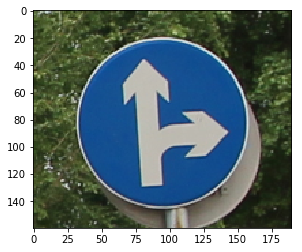

In [8]:
plt.imshow(read_tsrd_sample(20))

In [9]:
with open('./data/data_unzipped/classification/belgium_classes.yaml') as f:
    belgium_classes = yaml.load(f)
    
with open('./data/data_unzipped/classification/GTSRB_classes.yaml') as f:
    gtsrb_classes = yaml.load(f)
    
with open('./data/data_unzipped/classification/TSRD_classes.yaml') as f:
    tsrd_classes = yaml.load(f)

In [10]:
classes_df = pd.DataFrame(columns=['name', 'belgium_id', 'gtsrb_id', 'tsrd_id'])

In [11]:
all_classes = list(belgium_classes.values()) + list(gtsrb_classes.values()) + list(tsrd_classes.values())
print(len(all_classes))
unique_classes = list(set(all_classes))
print(len(unique_classes))

166
113


In [12]:
for cls in unique_classes:
    belg_keys = { key for key,value in belgium_classes.items() if value==cls }
    gtsrb_keys = { key for key,value in gtsrb_classes.items() if value==cls }
    tsrd_keys = { key for key,value in tsrd_classes.items() if value==cls }
    
    classes_df = classes_df.append({'name': cls,
                                    'belgium_id': belg_keys.pop() if belg_keys else None,
                                    'gtsrb_id': gtsrb_keys.pop() if gtsrb_keys else None,
                                    'tsrd_id': tsrd_keys.pop() if tsrd_keys else None}, 
                                   ignore_index=True)

In [13]:
classes_df = classes_df.sort_values('name')
classes_df

,name,belgium_id,gtsrb_id,tsrd_id
31,bend_left,3,19,39
51,bend_right,4,20,38
33,bends,None,None,46
111,bends_first_left,5,21,None
79,bends_first_right,6,None,None
17,bumpy_road,0,22,None
39,cars_only,None,None,28
59,children,7,28,37
15,chinese,None,None,42
99,closed_both_directions,28,15,53


In [14]:
len(classes_df)

113

In [15]:
classes_df[~classes_df.belgium_id.isna() & ~classes_df.gtsrb_id.isna() & ~classes_df.tsrd_id.isna()]

,name,belgium_id,gtsrb_id,tsrd_id
31,bend_left,3,19,39
51,bend_right,4,20,38
59,children,7,28,37
99,closed_both_directions,28,15,53
88,give_way,19,13,56
48,hazard,13,18,34
4,keep_left,64,39,25
16,keep_right,63,38,26
27,left_only,35,34,22
9,no_entry,22,17,55


In [16]:
len(classes_df[~classes_df.belgium_id.isna() & ~classes_df.gtsrb_id.isna() & ~classes_df.tsrd_id.isna()])

17

In [17]:
def count_class_belgium(class_id):
    if class_id is None:
        return 0
    return len(os.listdir(f'data/data_unzipped/classification/Belgium/train/{class_id:05}/')) - 1

def count_class_gtsrb(class_id):
    if class_id is None:
        return 0
    return len(os.listdir(f'data/data_unzipped/classification/GTSRB/train/{class_id:05}/')) - 1

def count_class_tsrd(class_id):
    if class_id is None:
        return 0
    files = os.listdir(f'data/data_unzipped/classification/TSRD/train/')
    files = [file for file in files if f'{class_id:03}' == file.split('_')[0]]
    return len(files)

In [18]:
classes_df['belgium_count'] = classes_df.belgium_id.apply(count_class_belgium)
classes_df['gtsrb_count'] = classes_df.gtsrb_id.apply(count_class_gtsrb)
classes_df['tsrd_count'] = classes_df.tsrd_id.apply(count_class_tsrd)

In [19]:
classes_df['overall_count'] = classes_df.belgium_count + classes_df.gtsrb_count + classes_df.tsrd_count

In [20]:
pd.set_option('display.max_rows', 500)
classes_df

,name,belgium_id,gtsrb_id,tsrd_id,belgium_count,gtsrb_count,tsrd_count,overall_count
31,bend_left,3,19,39,15,210,34,259
51,bend_right,4,20,38,15,360,30,405
33,bends,None,None,46,0,0,18,18
111,bends_first_left,5,21,None,14,330,0,344
79,bends_first_right,6,None,None,15,0,0,15
17,bumpy_road,0,22,None,15,390,0,405
39,cars_only,None,None,28,0,0,446,446
59,children,7,28,37,157,540,58,755
15,chinese,None,None,42,0,0,32,32
99,closed_both_directions,28,15,53,125,630,2,757


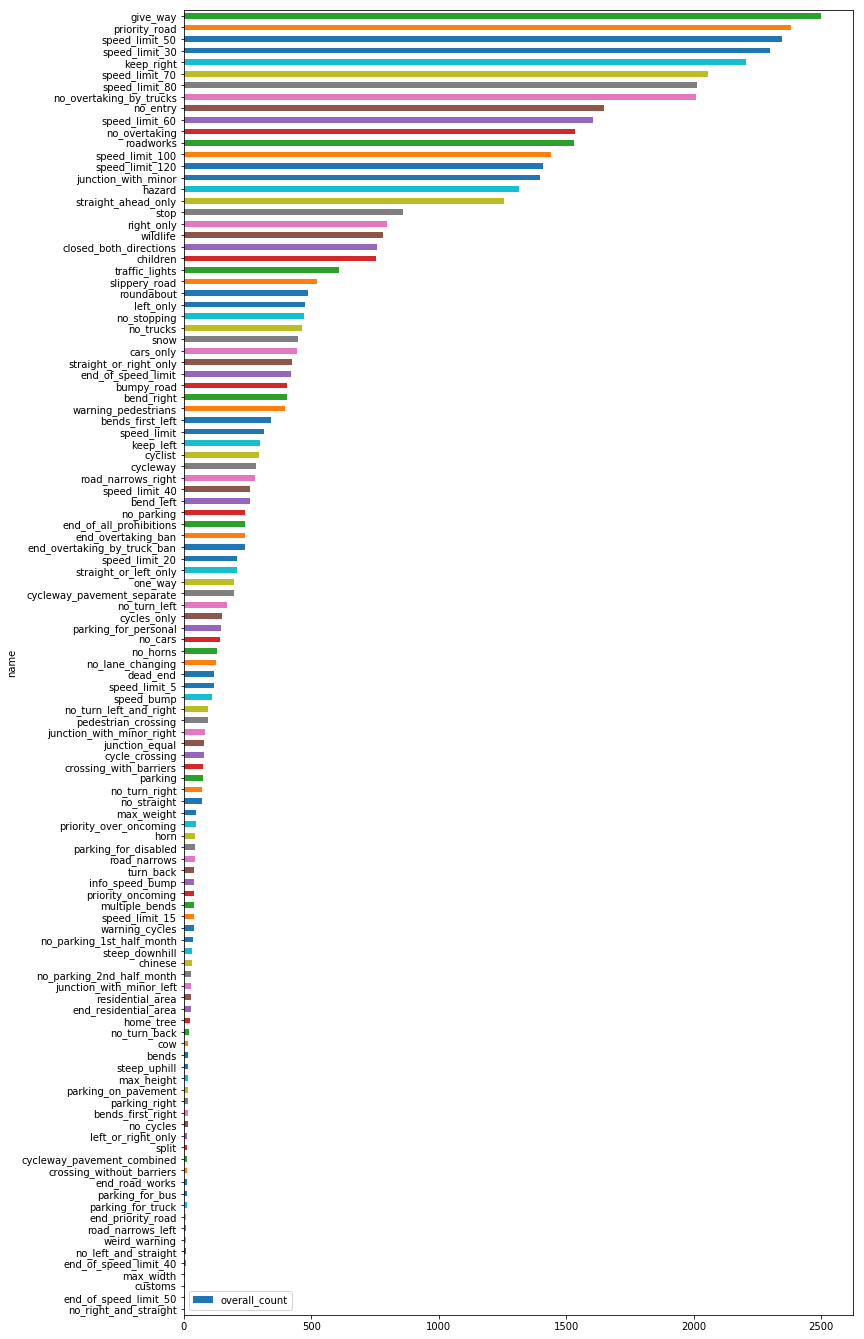

In [21]:
classes_df.sort_values('overall_count').plot(kind='barh', x='name', y='overall_count', figsize=(12,24))

In [22]:
classes_df.sort_values('overall_count', ascending=False)

,name,belgium_id,gtsrb_id,tsrd_id,belgium_count,gtsrb_count,tsrd_count,overall_count
88,give_way,19,13,56,231,2160,110,2501
24,priority_road,61,12,None,282,2100,0,2382
42,speed_limit_50,None,2,4,0,2250,98,2348
98,speed_limit_30,None,1,2,0,2220,80,2300
16,keep_right,63,38,26,11,2070,126,2207
60,speed_limit_70,None,4,6,0,1980,78,2058
108,speed_limit_80,None,5,7,0,1860,152,2012
41,no_overtaking_by_trucks,None,10,None,0,2010,0,2010
9,no_entry,22,17,55,375,1110,162,1647
104,speed_limit_60,None,3,5,0,1410,194,1604


In [39]:
ll = !ls ./data/classification/train/
ll = set(ll)

In [ ]:
ll.intersection(classes)

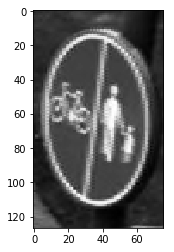

In [37]:
gg = read_belgium_sample(39)
plt.imshow(gg.mean(2), cmap='gray')

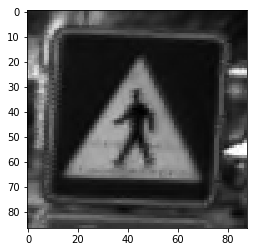

In [28]:
gg = read_belgium_sample(56)
plt.imshow(gg.mean(2), cmap='gray')

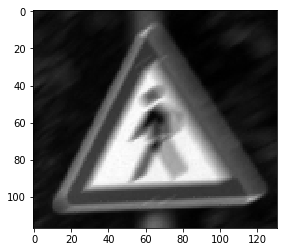

In [19]:
gg = read_gtsrb_sample(27)
plt.imshow(gg.mean(2), cmap='gray')

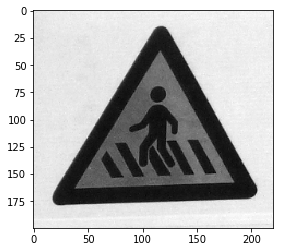

In [15]:
gg = read_tsrd_sample(35)
plt.imshow(gg.mean(axis=2), cmap='gray')

In [27]:
g = classes_df[classes_df.overall_count>=500]
print(len(g))
g

24


,name,belgium_id,gtsrb_id,tsrd_id,belgium_count,gtsrb_count,tsrd_count,overall_count
4,children,7,28,37,157,540,58,755
27,closed_both_directions,28,15,53,125,630,2,757
96,give_way,19,13,56,231,2160,110,2501
12,hazard,13,18,34,90,1200,26,1316
99,junction_with_minor,17,11,None,79,1320,0,1399
55,keep_right,63,38,26,11,2070,126,2207
76,no_entry,22,17,55,375,1110,162,1647
46,no_overtaking,31,9,None,63,1470,0,1533
75,no_overtaking_by_trucks,None,10,None,0,2010,0,2010
22,priority_road,61,12,None,282,2100,0,2382


In [32]:
classes_in_all_datasets = classes_df[~classes_df.belgium_id.isna() & ~classes_df.gtsrb_id.isna() & ~classes_df.tsrd_id.isna()]
classes_in_all_datasets

In [35]:
natural_extensions = ['right_only', 'straight_or_left_only']
should_be_included = ['priority_road']

In [97]:
classes_to_include = list(classes_in_all_datasets.name) + natural_extensions + should_be_included

classes_to_include = classes_df[classes_df.name.isin(classes_to_include)]
classes_to_include

In [42]:
len(classes_to_include)

17

In [147]:
list(classes_to_include.name)

['bend_left',
 'bend_right',
 'children',
 'closed_both_directions',
 'give_way',
 'hazard',
 'left_only',
 'no_entry',
 'priority_road',
 'right_only',
 'roadworks',
 'roundabout',
 'stop',
 'straight_ahead_only',
 'straight_or_left_only',
 'straight_or_right_only',
 'traffic_lights']

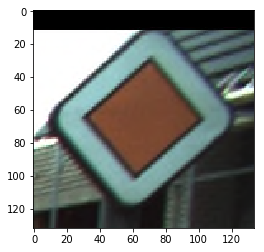

In [119]:
gg = read_belgium_sample(61)
plt.imshow(gg)

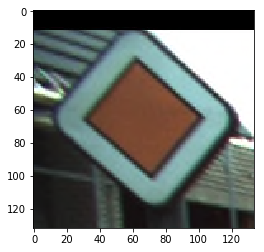

In [120]:
plt.imshow(cv2.flip(gg, flipCode=1))

In [121]:
chain = Flip() + ChangeLabel('turnleft')
smpl = Sample(gg, 'turnright', 'own')

Text(0.5,1,'turnright')

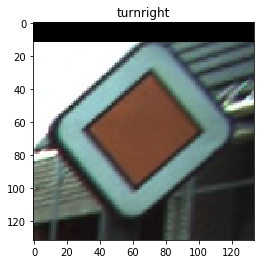

In [122]:
plt.imshow(smpl.image)
plt.title(smpl.label)

Text(0.5,1,'turnleftinferred_own')

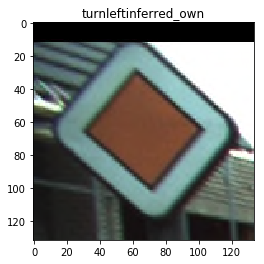

In [123]:
res = chain(smpl)
plt.imshow(res.image)
plt.title(res.label+res.origin)

In [124]:
print(ClassIs('turnleft')(smpl))
print(ClassIs('turnleft')(res))

print(DatasetIs('own')(smpl))
print(DatasetIs('own')(res))

print((ClassIs('turnright')*DatasetIs('own'))(smpl))

False
True
True
False
True


In [125]:
rule = Rule(predicate=ClassIs('turnright')*DatasetIs('own'),
            inference=Flip()+ChangeLabel('turnleft'))

Text(0.5,1,'turnleft')

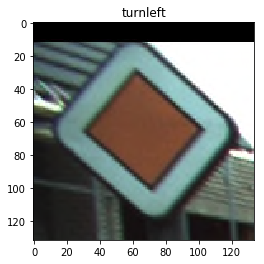

In [126]:
resrule = rule(smpl)
plt.imshow(resrule.image)
plt.title(resrule.label)

In [127]:
def common_predicate_rules(common_predicate, inferences):
    res = []
    for inference in inferences:
        res.append(Rule(common_predicate, inference))
    return res

def common_inference_rules(predicates, common_inference):
    res = []
    for predicate in predicates:
        res.append(Rule(predicate, common_inference))
    return res

In [128]:
priority_road_rules = common_predicate_rules(ClassIs('priority_road'), 
                                             [Flip('vertical'), Flip('horizontal'), 
                                              Rotate('90'), Rotate('180'), Rotate('270')])
RULESET = priority_road_rules

In [129]:
smpl = Sample(gg, 'priority_road', 'belgium')

In [130]:
res = []
for rule in RULESET:
    r = rule(smpl)
    if r:
        res.append(r)

In [131]:
res

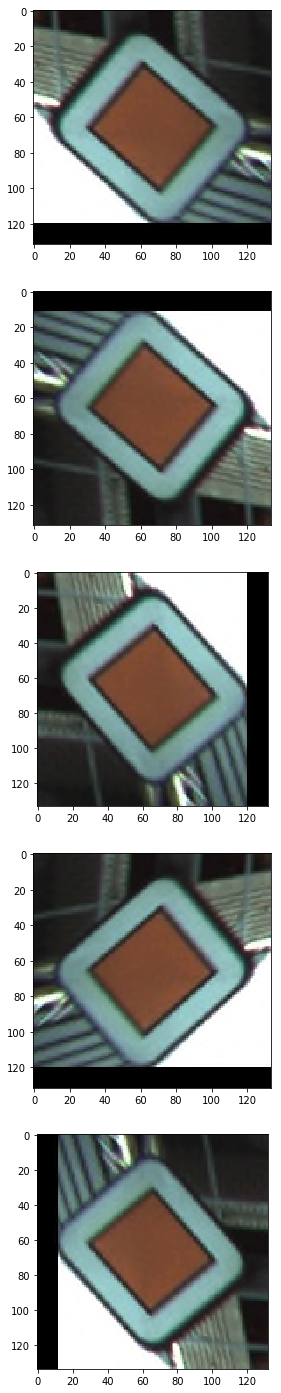

In [133]:
fig, ax = plt.subplots(nrows=len(res), figsize=(6, 5*len(res)))

for i, s in enumerate(res):
    ax[i].imshow(s.image)

In [135]:
cv2.transpose(gg)

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [48, 41, 34],
        [48, 41, 33],
        [48, 41, 32]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [50, 41, 35],
        [51, 42, 35],
        [52, 42, 35]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [51, 39, 35],
        [54, 42, 36],
        [55, 43, 36]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [31, 34, 32],
        [34, 36, 35],
        [32, 35, 34]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [32, 34, 33],
        [34, 37, 35],
        [33, 35, 34]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [34, 36, 35],
        [36, 38, 37],
        [34, 36, 35]]], dtype=uint8)

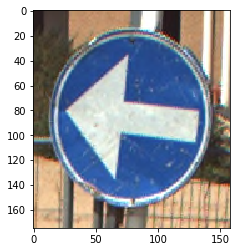

In [151]:
plt.imshow(read_belgium_sample(35))

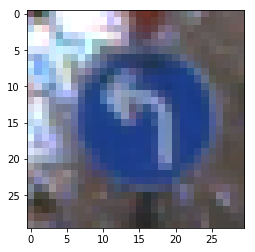

In [152]:
plt.imshow(read_gtsrb_sample(34))

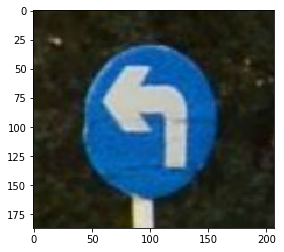

In [153]:
plt.imshow(read_tsrd_sample(22))